1. Загрузить данные согласно своему варианту. Данные представляют
собой таблицу, состоящую из 5 столбцов: 1 столбец – это номер класса,
к которому принадлежит наблюдение, остальные столбцы – некоторые
переменные, которыми задано текущее наблюдение. Предполагается, что
данные распределены по многомерному нормальному закону.

In [1]:
import numpy as np
import pandas as pd


data = pd.read_csv('var9.csv', delimiter=';', encoding='latin-1')

print(data.head())
print(len(data))

   class       x.1       x.2       x.3       x.4
0      1  1.941937  2.177720  1.697662  2.485917
1      1  1.341638  1.695853  1.120957  2.063743
2      1  0.718682  0.545417  0.545678  1.052773
3      1  2.493175  2.980858  2.586567 -0.329526
4      1  1.860307  2.284613  1.792715 -0.697288
150


2. Удалить из выборки 15 случайных наблюдений (сохранить их
отдельно). Оставшуюся выборку назовем обучающей. По ней мы будет
обучать классификаторы. Сохраненные отдельно 15 наблюдений будем
называть проверочн

In [2]:
from sklearn.model_selection import train_test_split

# Удаление 15 случайных наблюдений и сохранение их
random_observation = data.sample(n=15, random_state=42)
data_train = data.drop(random_observation.index)

# Разделение данных на обучающую и проверочную выборки
train_data, validation_data = train_test_split(data_train, test_size=15, random_state=42)

# Вывод информации о размере обучающей и проверочной выборок
print("Размер обучающей выборки:", len(train_data))
print("Размер проверочной выборки:", len(validation_data))

# Сохранение данных в отдельные файлы (если нужно)
# random_observation.to_csv('random_observation.csv', index=False)
# train_data.to_csv('train_data.csv', index=False)
# validation_data.to_csv('validation_data.csv', index=False)


Размер обучающей выборки: 120
Размер проверочной выборки: 15


3. Построить линейный классификатор для решения задачи
классификации (см. файл Filzmoser-Lections.pdf стр. 50–51). Метод основан на
применении модели линейной регрессии для классификации. Реализовать
классификатор означает обучить его на имеющейся выборке (если это
необходимо), после чего уметь классифицировать любое новое наблюдение.
Обучить классификатор на обучающей выборке. Применить его
к проверочной выборке. Вывести количество ошибок, которое дал
построенный классификатор для проверочной выборки.

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Разделение данных на признаки (X) и метки классов (y)
X_train = train_data.iloc[:, 1:]
y_train = train_data.iloc[:, 0]

X_validation = validation_data.iloc[:, 1:]
y_validation = validation_data.iloc[:, 0]

# Создание и обучение модели линейной регрессии
linear_classifier = LinearRegression()
linear_classifier.fit(X_train, y_train)

# Применение модели к проверочной выборке
predictions = linear_classifier.predict(X_validation)

# Округление предсказанных значений до 0 или 1
predicted_labels = [1 if pred > 0.5 else 0 for pred in predictions]

# Оценка качества классификации
accuracy = accuracy_score(y_validation, predicted_labels)

# Вывод результата
print("Количество ошибок на проверочной выборке:", sum(y_validation != predicted_labels))
print(f"Accuracy на проверочной выборке: {accuracy*100:.2f}%")


Количество ошибок на проверочной выборке: 11
Accuracy на проверочной выборке: 26.67%


4. Реализовать метод классификации k-ближайших соседей (kNN,
k-nearest neighbors) для k = 3 и k = 5. Для нахождения расстояния использовать
классическую Евклидову метрику. Применить его к проверочной выборке.
Вывести количество ошибок, которое дал построенный классификатор для
проверочной выборки.

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Разделение данных на признаки (X) и метки классов (y)
X_train = train_data.iloc[:, 1:]
y_train = train_data.iloc[:, 0]

X_validation = validation_data.iloc[:, 1:]
y_validation = validation_data.iloc[:, 0]

# Реализация k-ближайших соседей для k=3
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train)
predictions_3 = knn_3.predict(X_validation)

# Оценка качества классификации для k=3
accuracy_3 = accuracy_score(y_validation, predictions_3)

# Вывод результата для k=3
print("Количество ошибок (k=3) на проверочной выборке:", sum(y_validation != predictions_3))
print(f"Accuracy (k=3) на проверочной выборке: {accuracy_3*100:.2f}%")

# Реализация k-ближайших соседей для k=5
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)
predictions_5 = knn_5.predict(X_validation)

# Оценка качества классификации для k=5
accuracy_5 = accuracy_score(y_validation, predictions_5)

# Вывод результата для k=5
print("\nКоличество ошибок (k=5) на проверочной выборке:", sum(y_validation != predictions_5))
print(f"Accuracy (k=5) на проверочной выборке: {accuracy_5*100:.2f}%")


Количество ошибок (k=3) на проверочной выборке: 2
Accuracy (k=3) на проверочной выборке: 86.67%

Количество ошибок (k=5) на проверочной выборке: 1
Accuracy (k=5) на проверочной выборке: 93.33%


5. (0,5 балла) Из переменных, описывающих наблюдения, выбрать две,
построить для них диаграмму рассеяния. Цвет и форму точек менять в
зависимости от номера класса.

/tmp/ipykernel_56116/2130666533.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Class'] = selected_data['class'].apply(lambda x: str(x))


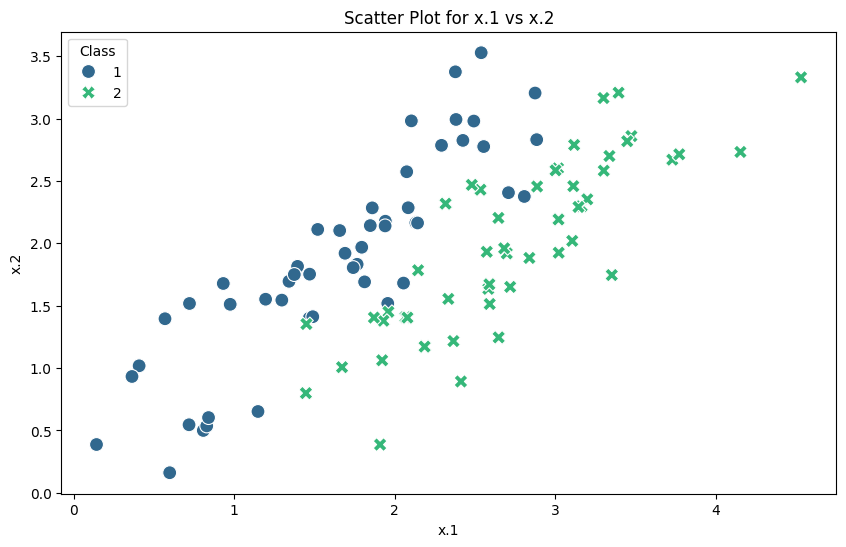

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Выбор переменных
variable1 = "x.1"
variable2 = "x.2"

# Выбираем два класса для построения диаграммы
selected_classes = [1, 2]

# Отбираем данные для выбранных классов
selected_data = data[data['class'].isin(selected_classes)]

# Добавление информации о классах к данным
selected_data['Class'] = selected_data['class'].apply(lambda x: str(x))

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(x=variable1, y=variable2, hue='Class', style='Class', data=selected_data, palette='viridis', s=100,
                )
plt.title(f"Scatter Plot for {variable1} vs {variable2}")
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.legend(title='Class')
plt.show()


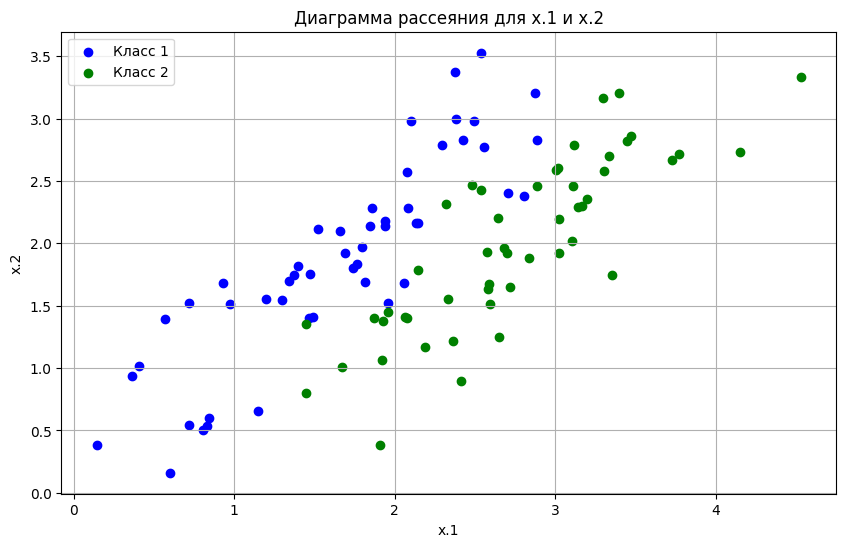

In [6]:
import matplotlib.pyplot as plt


# Выбор двух переменных для построения диаграммы рассеяния
variable1 = "x.1"
variable2 = "x.2"

# Создание цветового словаря для каждого класса
class_colors = {1: 'blue', 2 :'green'}

# Создание диаграммы рассеяния
plt.figure(figsize=(10, 6))
for class_num, color in class_colors.items():
    class_data = data[data['class'] == class_num]
    plt.scatter(class_data[variable1], class_data[variable2], label=f"Класс {class_num}", color=color)

# Настройка внешнего вида диаграммы
plt.title(f"Диаграмма рассеяния для {variable1} и {variable2}")
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.legend()
plt.grid(True)
plt.show()

6. (1 балл) Построить линейный классификатор на основе только двух
переменных, выбранных в пункте 5. Изобразить на этой диаграмме границы
классов, получаемые для построенного линейного классификатора.

/home/yura/PycharmProjects/ML/venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


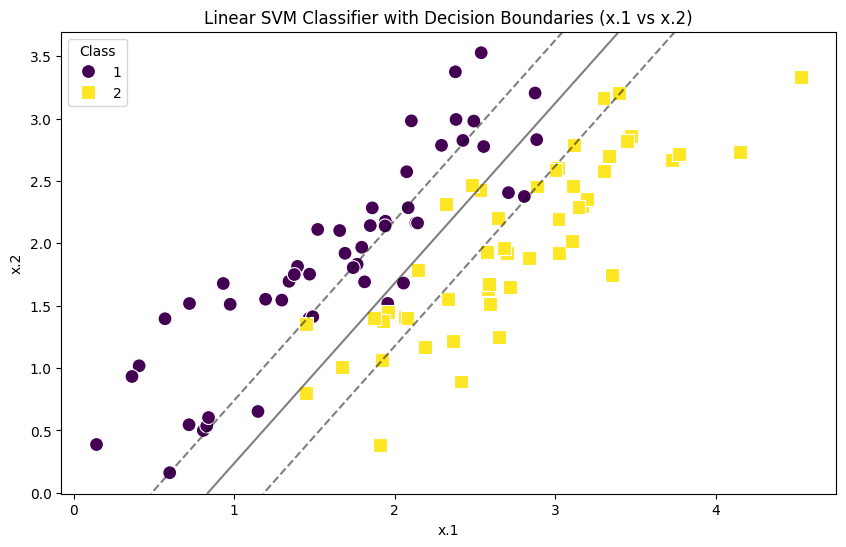

In [7]:
import numpy as np
from sklearn.svm import SVC

# Выбор переменных
variable1 = "x.1"
variable2 = "x.2"

# Выбираем два класса для построения диаграммы
selected_classes = [1, 2]

# Отбираем данные для выбранных классов
selected_data = data[data['class'].isin(selected_classes)]

# Разделение данных на признаки и метки классов
X = selected_data[[variable1, variable2]]
y = selected_data['class']

# Создание и обучение модели SVM
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X, y)

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(x=variable1, y=variable2, hue='class', style='class', data=selected_data, palette='viridis', s=100,
                markers=['o', 's'])

# Построение границ классов
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Создание сетки для предсказания
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = svm_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Отображение границы решения и границ классов
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.title(f"Linear SVM Classifier with Decision Boundaries ({variable1} vs {variable2})")
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.legend(title='Class')
plt.show()


7. (0,5 балла) Изобразить границы остальных классификаторов,
построенных на основе выбранных двух переменных.

/home/yura/PycharmProjects/ML/venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/yura/PycharmProjects/ML/venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/yura/PycharmProjects/ML/venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/yura/PycharmProjects/ML/venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


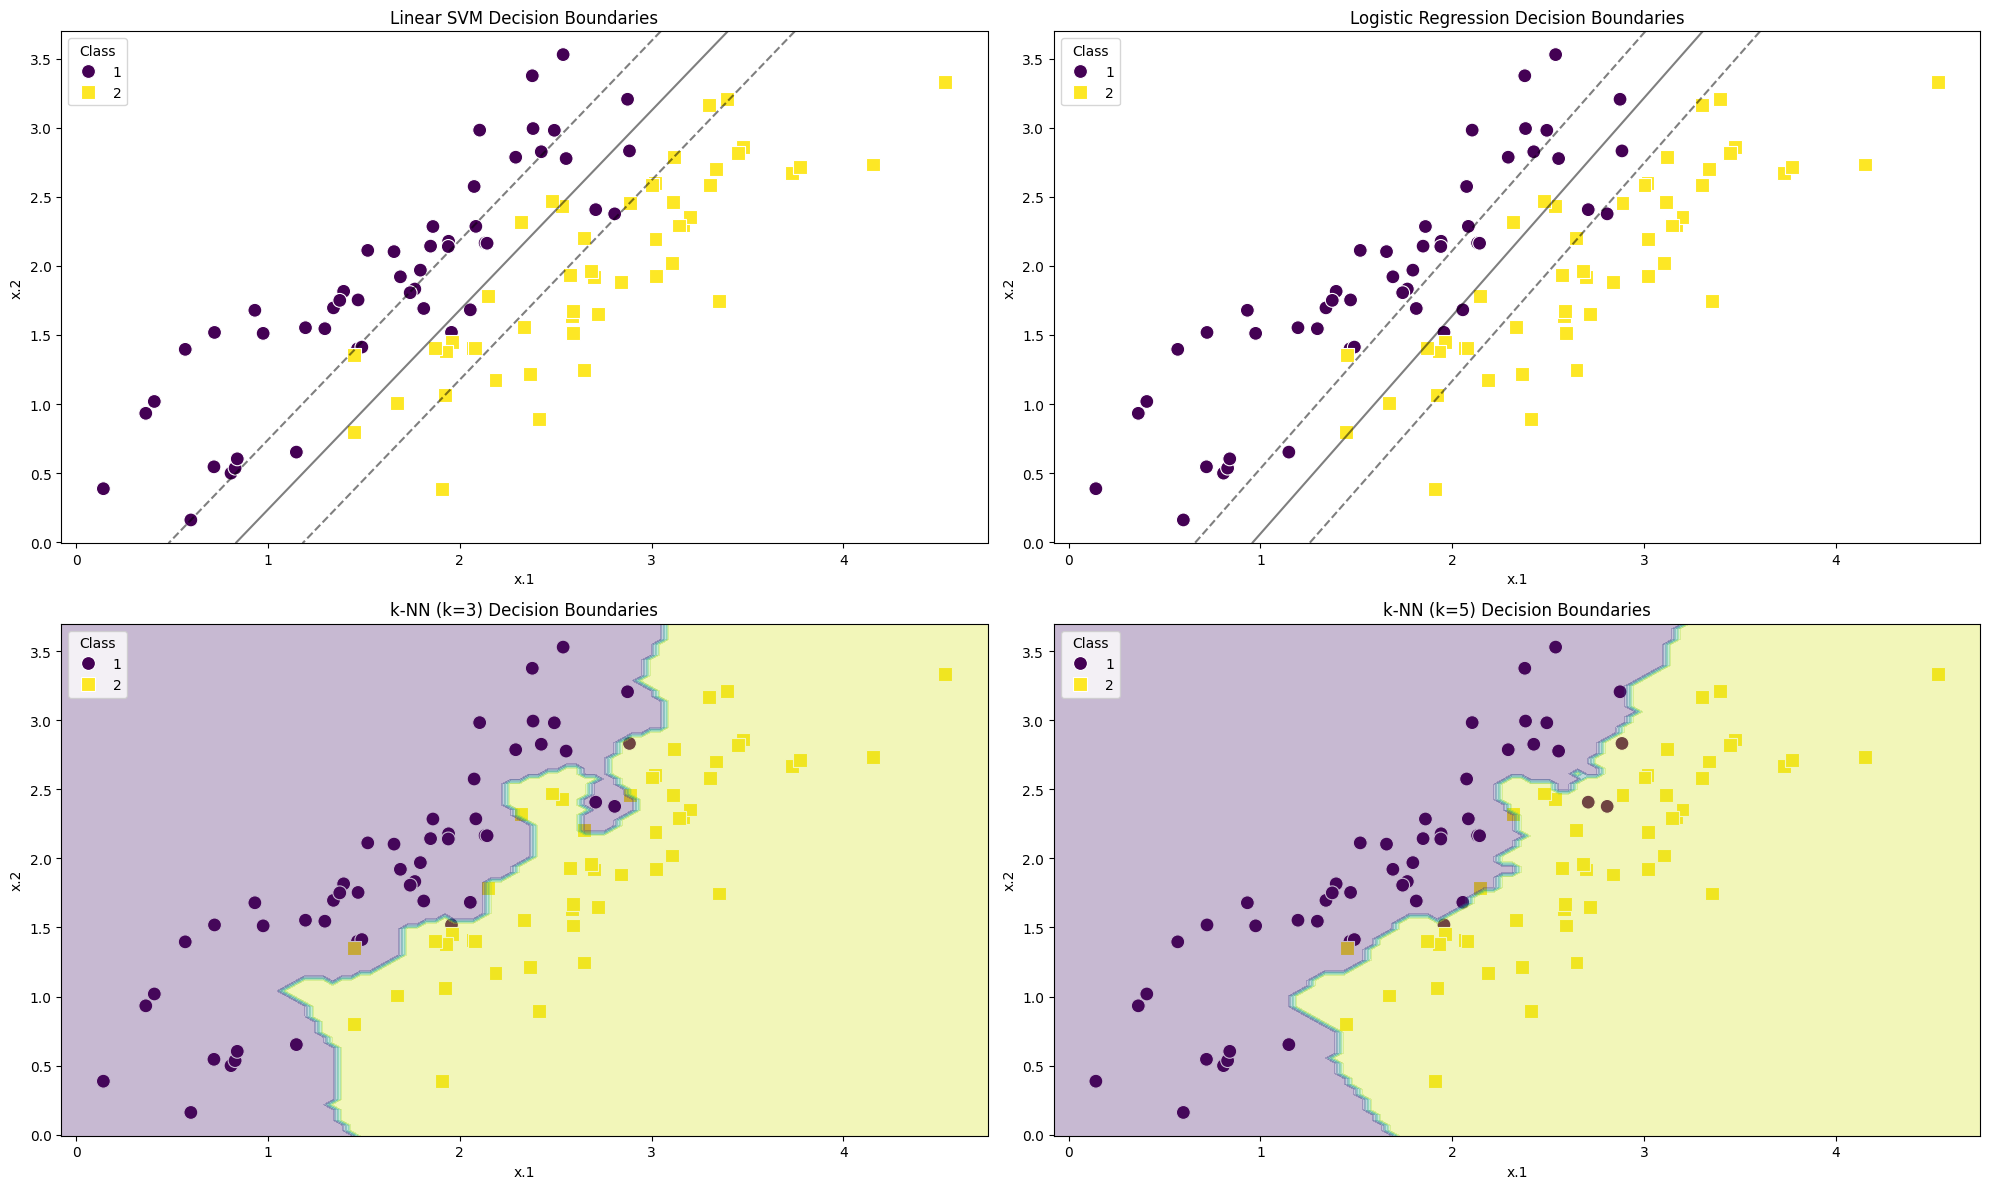

In [8]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Создание и обучение модели логистической регрессии
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X, y)

# Создание и обучение модели k-ближайших соседей для k=3
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X, y)

# Создание и обучение модели k-ближайших соседей для k=5
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X, y)

# Построение границ для каждого классификатора
classifiers = [svm_classifier, logistic_classifier, knn_3, knn_5]
classifier_names = ['Linear SVM', 'Logistic Regression', 'k-NN (k=3)', 'k-NN (k=5)']

plt.figure(figsize=(20, 12))
for i, classifier in enumerate(classifiers, 1):
    plt.subplot(2, 2, i)

    # Построение диаграммы рассеяния
    sns.scatterplot(x=variable1, y=variable2, hue='class', style='class', data=selected_data, palette='viridis', s=100,
                    markers=['o', 's'])

    # Построение границ классов
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Создание сетки для предсказания
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()]) if hasattr(classifier, 'decision_function') else None

    if Z is not None:
        # Для SVM и логистической регрессии отображаем только границу решения
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    else:
        # Для k-NN отображаем границу классов
        Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

    plt.title(f"{classifier_names[i-1]} Decision Boundaries")
    plt.xlabel(variable1)
    plt.ylabel(variable2)
    plt.legend(title='Class')

plt.tight_layout()
plt.show()


8. (1 балл) Реализовать метод линейного дискриминантного анализа
(см. файл Filzmoser-Lections.pdf стр. 51–53 и конспект лекций). Обучить
классификатор на обучающей выборке. Применить его к проверочной
выборке. Вывести количество ошибок, которое дал построенный
классификатор для проверочной выборки.

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Разделение данных на признаки и метки классов
X_train = train_data.iloc[:, 1:]
y_train = train_data.iloc[:, 0]

X_validation = validation_data.iloc[:, 1:]
y_validation = validation_data.iloc[:, 0]

# Создание и обучение модели LDA
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train, y_train)

# Применение модели к проверочной выборке
predictions_lda = lda_classifier.predict(X_validation)

# Оценка качества классификации и вывод результата
accuracy_lda = accuracy_score(y_validation, predictions_lda)
error_count_lda = sum(y_validation != predictions_lda)

print("Количество ошибок (LDA) на проверочной выборке:", error_count_lda)
print("Accuracy (LDA) на проверочной выборке:", accuracy_lda)


Количество ошибок (LDA) на проверочной выборке: 1
Accuracy (LDA) на проверочной выборке: 0.9333333333333333


9. (1 балл) Реализовать метод квадратичного дискриминантного анализа
(см. файл Filzmoser-Lections.pdf стр. 53 и конспект лекций). Обучить
классификатор на обучающей выборке. Применить его к проверочной
выборке. Вывести количество ошибо

In [10]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Разделение данных на признаки и метки классов
X_train = train_data.iloc[:, 1:]
y_train = train_data.iloc[:, 0]

X_validation = validation_data.iloc[:, 1:]
y_validation = validation_data.iloc[:, 0]

# Создание и обучение модели QDA
qda_classifier = QuadraticDiscriminantAnalysis()
qda_classifier.fit(X_train, y_train)

# Применение модели к проверочной выборке
predictions_qda = qda_classifier.predict(X_validation)

# Оценка качества классификации и вывод результата
accuracy_qda = accuracy_score(y_validation, predictions_qda)
error_count_qda = sum(y_validation != predictions_qda)

print("Количество ошибок (QDA) на проверочной выборке:", error_count_qda)
print("Accuracy (QDA) на проверочной выборке:", accuracy_qda)


Количество ошибок (QDA) на проверочной выборке: 1
Accuracy (QDA) на проверочной выборке: 0.9333333333333333


10. (1 балл) Разобраться в методе опорных векторов (svm, support vector
machine) для 2 классов. В выборке оставить наблюдения только из 2 классов.
Применить готовую реализацию. Проинтерпретировать полученные
результаты. Проиллюстрировать результаты работы метода.

/home/yura/PycharmProjects/ML/venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


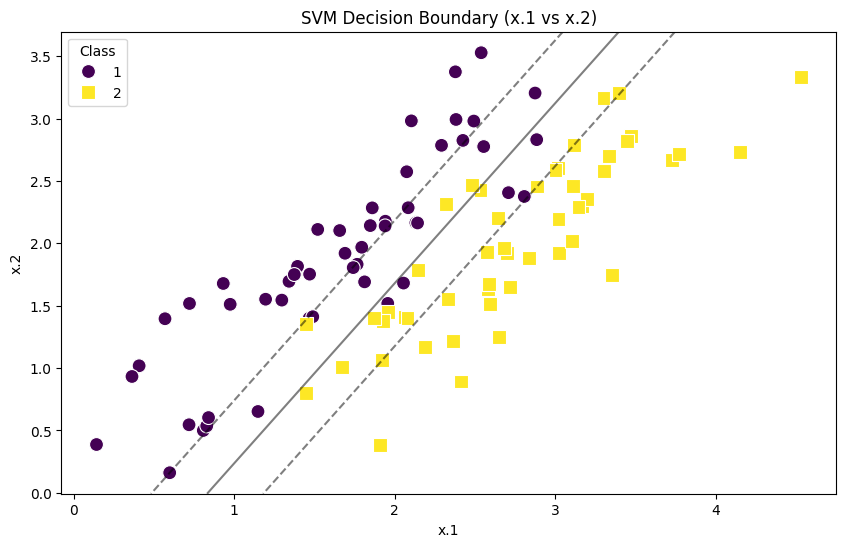

In [11]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

# Выбор переменных
variable1 = "x.1"
variable2 = "x.2"

# Выбираем два класса для анализа
selected_classes = [1, 2]

# Отбираем данные для выбранных классов
selected_data_svm = data[data['class'].isin(selected_classes)]

# Разделение данных на признаки и метки классов
X_svm = selected_data_svm[[variable1, variable2]]
y_svm = selected_data_svm['class']

# Создание и обучение модели SVM
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_svm, y_svm)

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(x=variable1, y=variable2, hue='class', style='class', data=selected_data_svm, palette='viridis', s=100,
                markers=['o', 's'])

# Построение границы решения SVM
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Создание сетки для предсказания
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = svm_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Отображение границы решения
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.title(f"SVM Decision Boundary ({variable1} vs {variable2})")
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.legend(title='Class')
plt.show()


11. (2 балла) Для всех реализованных методов классификации данных
реализовать описанный выше метод сравнения

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Задаем долю p
p = 0.1

# Количество повторений
M = 100

# Список для сохранения вероятностей ошибок для каждого метода
error_probabilities = []

# Разделение данных на признаки и метки классов
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

# Применяем метод сравнения для каждого метода классификации
for classifier, classifier_name in zip([svm_classifier, logistic_classifier, knn_3, knn_5, lda_classifier, qda_classifier],
                                       ['Linear SVM', 'Logistic Regression', 'k-NN (k=3)', 'k-NN (k=5)', 'LDA', 'QDA']):
    error_rates = []
    for _ in range(M):
        # Разбиваем данные на обучающую и тестовую выборки случайным образом
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=p, random_state=None)

        # Обучение модели
        classifier.fit(X_train, y_train)

        # Предсказание на тестовой выборке
        y_pred = classifier.predict(X_test)

        # Вычисление вероятности ошибочной классификации
        error_rate = 1 - accuracy_score(y_test, y_pred)
        error_rates.append(error_rate)

    # Сохраняем усредненную вероятность ошибки для текущего метода
    mean_error_rate = np.mean(error_rates)
    error_probabilities.append((classifier_name, mean_error_rate))

# Вывод результатов
for classifier_name, mean_error_rate in error_probabilities:
    print(f"Средняя вероятность ошибки для {classifier_name}: {mean_error_rate*100:.4f}%")


Средняя вероятность ошибки для Linear SVM: 8.6000%
Средняя вероятность ошибки для Logistic Regression: 6.4000%
Средняя вероятность ошибки для k-NN (k=3): 12.9333%
Средняя вероятность ошибки для k-NN (k=5): 11.0000%
Средняя вероятность ошибки для LDA: 9.2667%
Средняя вероятность ошибки для QDA: 6.3333%
